In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pylab as pylab

params = {'axes.labelsize': 'xx-large',
          'xtick.labelsize': 'xx-large',
          'ytick.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'legend.fontsize': 'xx-large',
          #'font.size': 16,
          'axes.titlesize': 'xx-large',
          'figure.titlesize': 'xx-large',
          }
pylab.rcParams.update(params)

Values from phase 2 dataset analysis

In [3]:
MIN_TEMP = 5.6
MIN_HUMIDITY = 10 #percent

In [4]:
weather_features = ['outdoor_dry_bulb_temperature','outdoor_relative_humidity','direct_solar_irradiance','diffuse_solar_irradiance']
df_bline = pd.read_csv(r'default SAC 500 norm space results\baseline_obs-a.csv',
                       usecols=weather_features)
df_adv = pd.read_csv(r'default SAC 500 norm space results\untargeted_binary_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs_adv_obs-a.csv',
                       usecols=weather_features)

In [5]:
spreads = pd.read_csv('citylearn_challenge_2022_phase_2 spread.csv',
                      index_col=0)

In [6]:
spreads

,spread
outdoor_dry_bulb_temperature,26.600000
outdoor_dry_bulb_temperature_predicted_6h,26.600000
outdoor_dry_bulb_temperature_predicted_12h,26.600000
outdoor_dry_bulb_temperature_predicted_24h,26.600000
outdoor_relative_humidity,90.000000
outdoor_relative_humidity_predicted_6h,90.000000
outdoor_relative_humidity_predicted_12h,90.000000
outdoor_relative_humidity_predicted_24h,90.000000
diffuse_solar_irradiance,1017.000000
diffuse_solar_irradiance_predicted_6h,1017.000000


In [7]:
df_bline

,outdoor_dry_bulb_temperature,outdoor_relative_humidity,diffuse_solar_irradiance,direct_solar_irradiance
0,0.541353,0.822222,0.000000,0.000000
1,0.545113,0.766667,0.000000,0.000000
2,0.530075,0.755556,0.000000,0.000000
3,0.515038,0.755556,0.000000,0.000000
4,0.500000,0.755556,0.000000,0.000000
...,...,...,...,...
8754,0.582707,0.788889,0.214356,0.303253
8755,0.563910,0.822222,0.025565,0.136411
8756,0.582707,0.788889,0.000000,0.000000
8757,0.605263,0.766667,0.000000,0.000000


In [8]:
spreads.loc['outdoor_dry_bulb_temperature'].values

array([26.6])

In [9]:
df_temp = pd.DataFrame({})
df_temp['bline'] = df_bline['outdoor_dry_bulb_temperature']*spreads.loc['outdoor_dry_bulb_temperature'].values + MIN_TEMP
df_temp['adv'] = df_adv['outdoor_dry_bulb_temperature']*spreads.loc['outdoor_dry_bulb_temperature'].values + MIN_TEMP

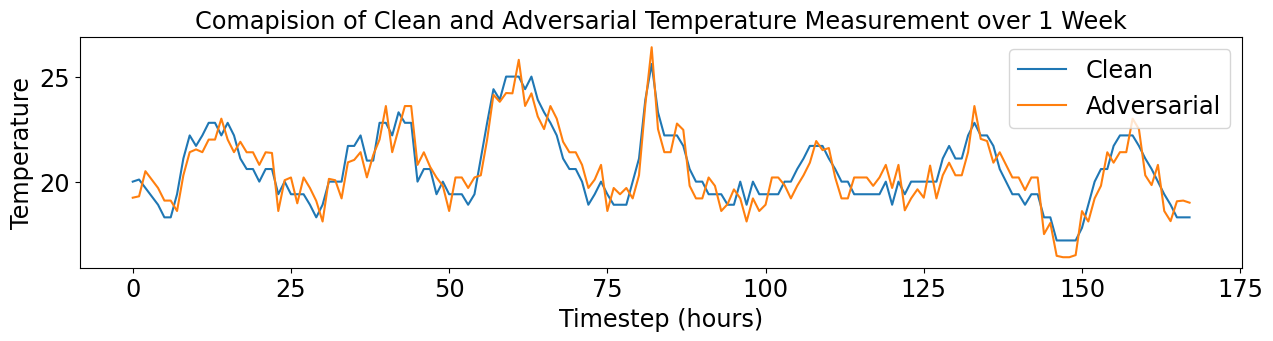

In [10]:
ax = df_temp.iloc[:24*7,:].plot.line(figsize=(15,3),
                                     title='Comapision of Clean and Adversarial Temperature Measurement over 1 Week')
ax.set_ylabel('Temperature')
ax.set_xlabel('Timestep (hours)')
ax.legend(['Clean','Adversarial'])

Looks mostly palusible or of a similar shape, but left of 125 we see temperatures rise during the night. Reading are plausible when temp is changing, but less so when temps are flat as the vlaue oscillates by 0.8 degrees.

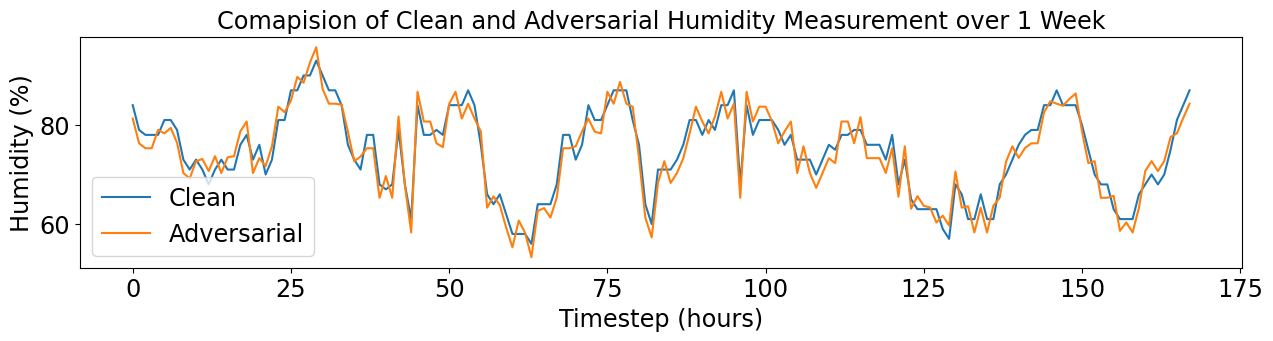

In [11]:
df_humidity = pd.DataFrame({})
df_humidity['bline'] = df_bline['outdoor_relative_humidity']*spreads.loc['outdoor_relative_humidity'].values + MIN_HUMIDITY
df_humidity['adv'] = df_adv['outdoor_relative_humidity']*spreads.loc['outdoor_relative_humidity'].values + MIN_HUMIDITY
ax = df_humidity.iloc[:24*7,:].plot.line(figsize=(15,3),
                                     title='Comapision of Clean and Adversarial Humidity Measurement over 1 Week')
ax.set_ylabel('Humidity (%)')
ax.set_xlabel('Timestep (hours)')
ax.legend(['Clean','Adversarial'])

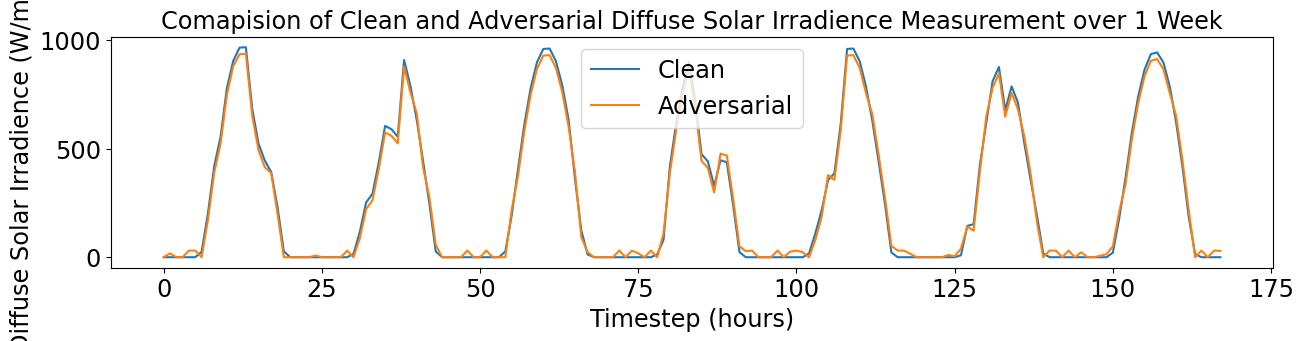

In [12]:
df_diffuse = pd.DataFrame({})
df_diffuse['bline'] = df_bline['diffuse_solar_irradiance']*spreads.loc['diffuse_solar_irradiance'].values
df_diffuse['adv'] = df_adv['diffuse_solar_irradiance']*spreads.loc['diffuse_solar_irradiance'].values
ax = df_diffuse.iloc[:24*7,:].plot.line(figsize=(15,3),
                                     title='Comapision of Clean and Adversarial Diffuse Solar Irradience Measurement over 1 Week')
ax.set_ylabel('Diffuse Solar Irradience (W/m^2)')
ax.set_xlabel('Timestep (hours)')
ax.legend(['Clean','Adversarial'])

Attack should check if irradience is zero, if to $\epsilon=0$

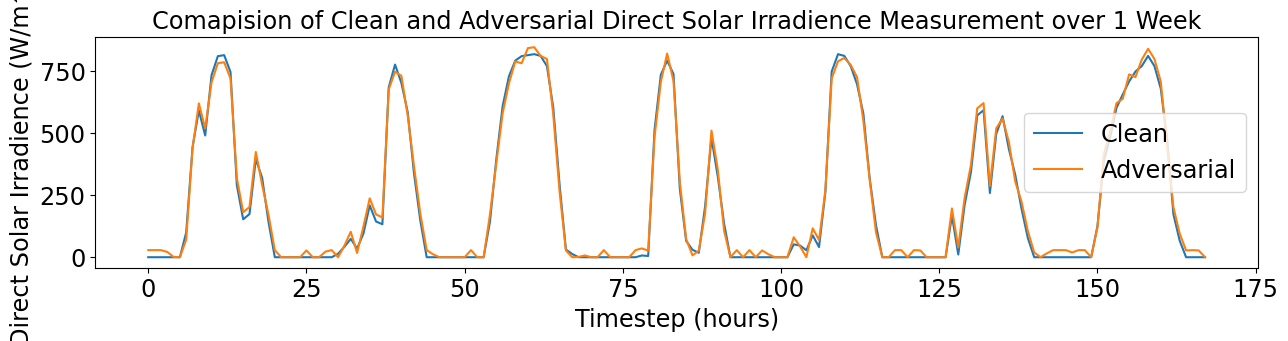

In [13]:
df_direct = pd.DataFrame({})
df_direct['bline'] = df_bline['direct_solar_irradiance']*spreads.loc['direct_solar_irradiance'].values
df_direct['adv'] = df_adv['direct_solar_irradiance']*spreads.loc['direct_solar_irradiance'].values
ax = df_direct.iloc[:24*7,:].plot.line(figsize=(15,3),
                                     title='Comapision of Clean and Adversarial Direct Solar Irradience Measurement over 1 Week')
ax.set_ylabel('Direct Solar Irradience (W/m^2)')
ax.set_xlabel('Timestep (hours)')
ax.legend(['Clean','Adversarial'])

In [14]:
help(ax.legend)

Help on method legend in module matplotlib.axes._axes:

legend(*args, **kwargs) method of matplotlib.axes._axes.Axes instance
    Place a legend on the Axes.
    
    Call signatures::
    
        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)
    
    The call signatures correspond to the following different ways to use
    this method:
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    .. note::
        Specifi

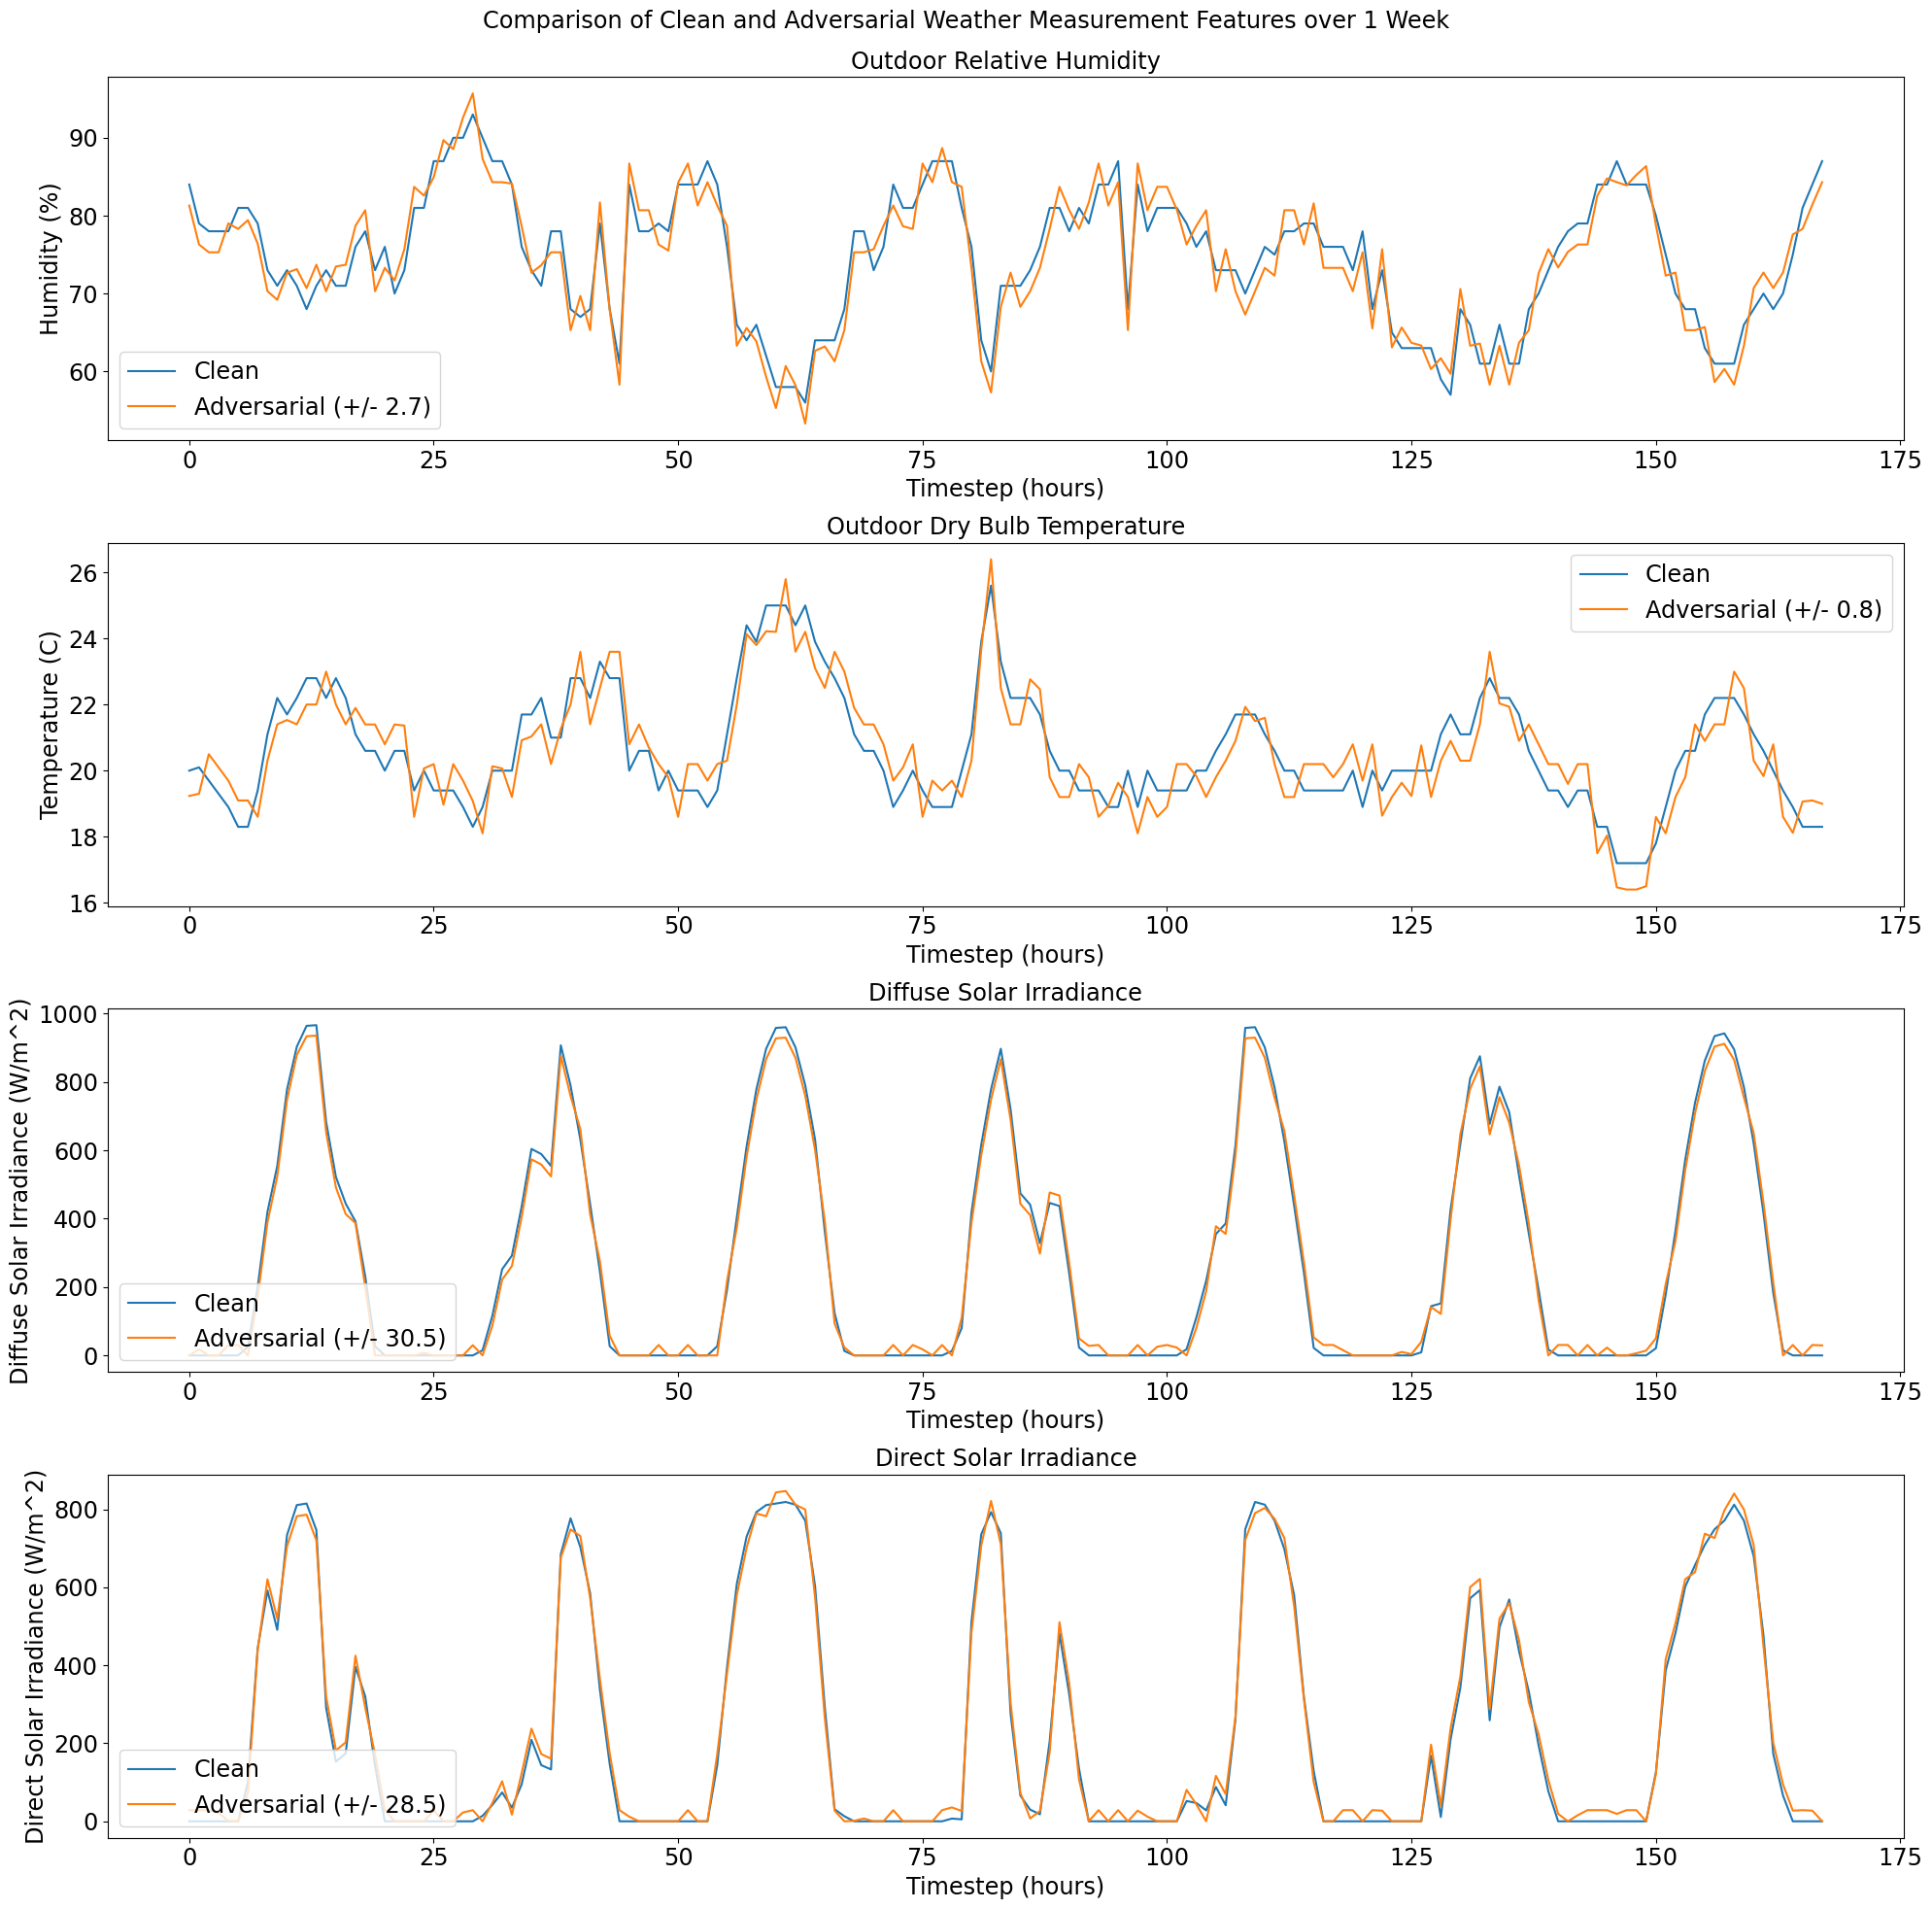

In [17]:
fig = plt.figure(figsize=[20,20],)
fig.suptitle('Comparison of Clean and Adversarial Weather Measurement Features over 1 Week\n')

plt.subplot(4, 1, 1) #(row, col, plt#)
ax = df_humidity.iloc[:24*7,:].plot.line(title='Outdoor Relative Humidity',
                                     ax=plt.gca(), #get current axis
                                     )
ax.set_ylabel('Humidity (%)')
ax.set_xlabel('Timestep (hours)')
ax.legend(['Clean','Adversarial (+/- 2.7)'])

plt.subplot(4, 1, 2) #(row, col, plt#)
ax = df_temp.iloc[:24*7,:].plot.line(title='Outdoor Dry Bulb Temperature',
                                     ax=plt.gca(), #get current axis
                                     ylabel='Temperature (C)',
                                     xlabel='Timestep (hours)'
                                     )
# ax.set_ylabel('Temperature')
# ax.set_xlabel('Timestep (hours)')
ax.legend(['Clean','Adversarial (+/- 0.8)'])

plt.subplot(4, 1, 3) #(row, col, plt#)
ax = df_diffuse.iloc[:24*7,:].plot.line(title='Diffuse Solar Irradiance',
                                     ax=plt.gca(), #get current axis
                                     )
ax.set_ylabel('Diffuse Solar Irradiance (W/m^2)')
ax.set_xlabel('Timestep (hours)')
ax.legend(['Clean','Adversarial (+/- 30.5)'],
          loc='lower left')
plt.subplot(4, 1, 4) #(row, col, plt#)

ax = df_direct.iloc[:24*7,:].plot.line(title='Direct Solar Irradiance',
                                     ax=plt.gca(), #get current axis
                                     )
ax.set_ylabel('Direct Solar Irradiance (W/m^2)')
ax.set_xlabel('Timestep (hours)')
ax.legend(['Clean','Adversarial (+/- 28.5)'],
          loc='lower left')
plt.tight_layout()